# Human Face Generator By Sketch

## Data Preprocessing

In [1]:
# Importing libraries for data preprocessing
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

C:\Users\PMLS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load all images in a directory into memory
def load_images(path, size=(256,512)):
    tar_list, src_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into sketch and real images
        real_img, sketch_img = pixels[:, :256], pixels[:, 256:]
        src_list.append(sketch_img)
        tar_list.append(real_img)
    return [asarray(src_list), asarray(tar_list)]
 
# dataset path
path = 'TrainDataset/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'facesnp.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Loaded:  (4497, 256, 256, 3) (4497, 256, 256, 3)
Saved dataset:  facesnp.npz


Loaded:  (4497, 256, 256, 3) (4497, 256, 256, 3)


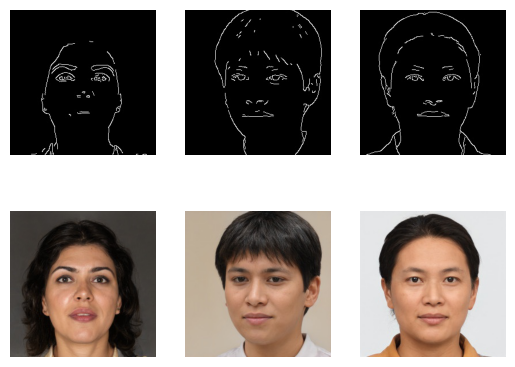

In [6]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('facesnp.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()